# TikTok Video Classification using Logistic Regression

## 1. Introduction
The unprecedented rise of social media platforms has revolutionized the way we consume and interact with content. Among these platforms, TikTok has emerged as a global phenomenon, captivating millions of users with its short-form, engaging videos. As the volume of content on TikTok continues to surge, distinguishing between factual claims and subjective opinions within these videos becomes an essential challenge. This project  aims to develop an intelligent classification system that can discern between objective claims and subjective opinions presented in TikTok videos. By analyzing the metadata of TikTok videos, this project aim to build a robust binary classification model that can accurately categorize videos into two primary classes: "claim" and "opinion". Metadata refers to the descriptive information associated with each video, such as the number of likes, comments, shares, video duration and verified status.

## 1. Exploratory Data Analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [6]:
dataset = pd.read_csv('tiktok_dataset.csv')

dataset.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Drop the `#`, `video_id` and `video_transcription_text` columns as they are not the metadata.

In [7]:
df = dataset.drop(columns=['#', 'video_id', 'video_transcription_text'])

### 1.1 Descriptive statistics

In [8]:
df.describe()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [9]:
df[df.isnull().any(axis=1)]

,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
19084,NaN,39,not verified,active,NaN,NaN,NaN,NaN,NaN
19085,NaN,60,not verified,active,NaN,NaN,NaN,NaN,NaN
19086,NaN,25,not verified,active,NaN,NaN,NaN,NaN,NaN
19087,NaN,7,not verified,active,NaN,NaN,NaN,NaN,NaN
19088,NaN,8,not verified,active,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19377,NaN,21,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,NaN,53,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,NaN,10,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,NaN,24,not verified,active,NaN,NaN,NaN,NaN,NaN


Drop the observations with the null values.

In [10]:
df = df.dropna()
df.isnull().sum()

claim_status            0
video_duration_sec      0
verified_status         0
author_ban_status       0
video_view_count        0
video_like_count        0
video_share_count       0
video_download_count    0
video_comment_count     0
dtype: int64

### 1.2 Distribution of label (`claim_status`) 

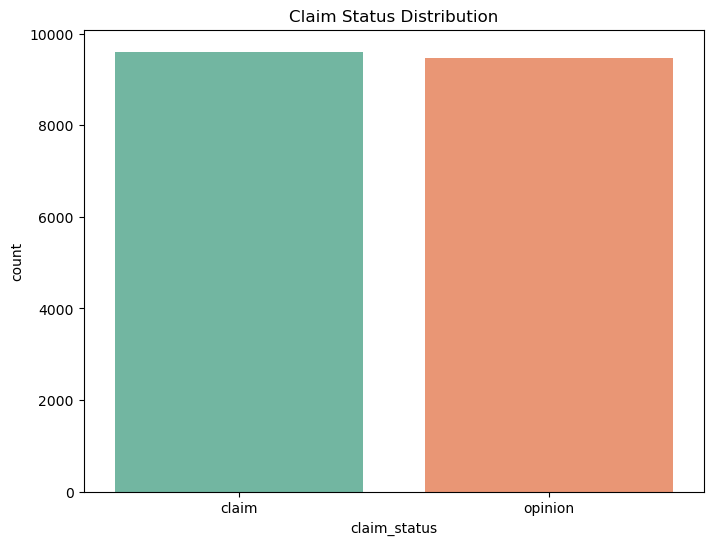

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='claim_status', palette='Set2')
plt.title('Claim Status Distribution')
plt.show()

The target variable exhibits a balanced distribution between 'claim' and 'opinion' labels, with each class accounting for approximately an equal proportion of the dataset.

### 1.3 Distribution of numerical features

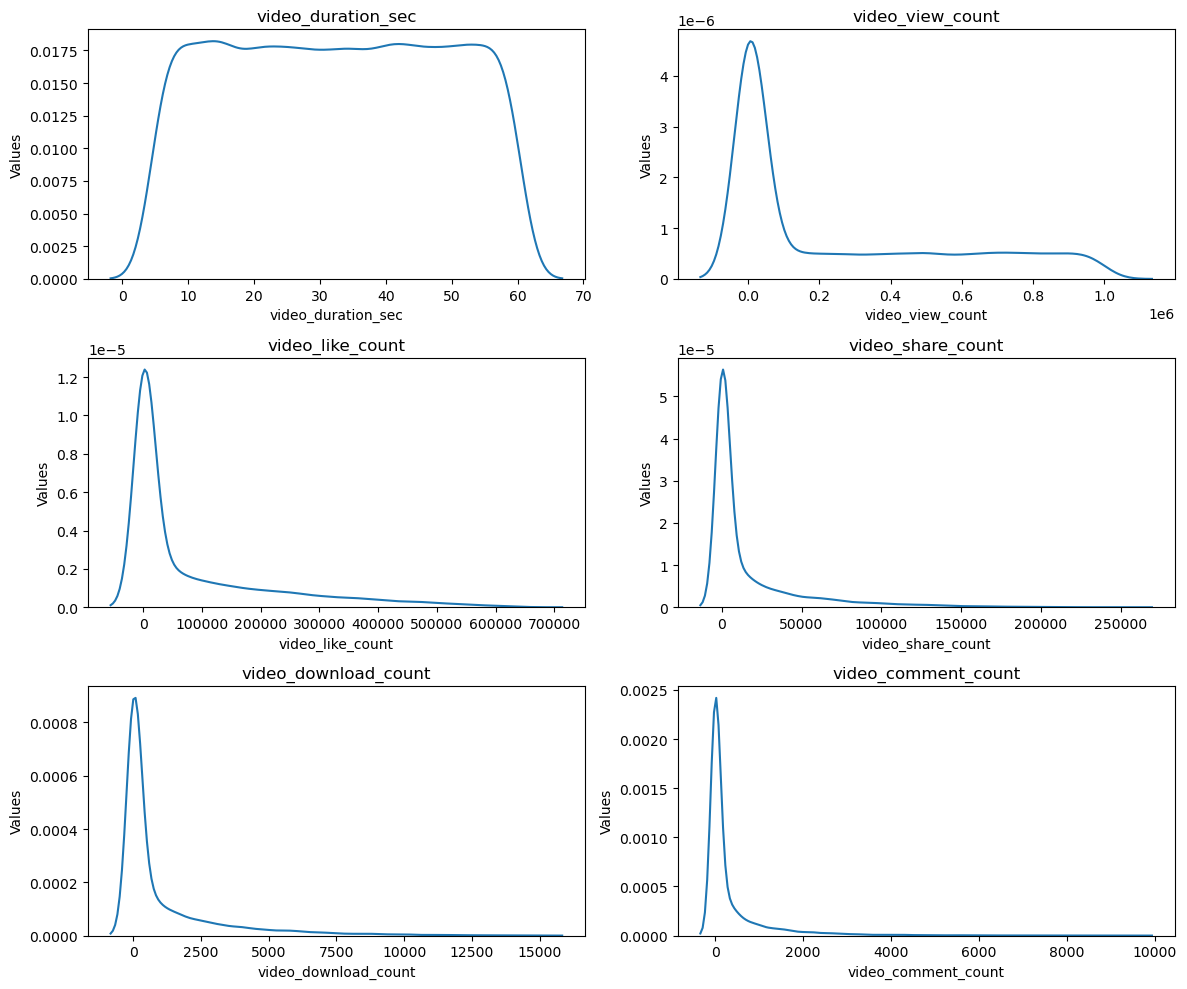

In [12]:
num_features = ['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']

plt.figure(figsize=(12, 10))

for i, col in enumerate(num_features):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(data=df, x=col)
    plt.title(col)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

The kernel density estimate (KDE) plots for the numerical features reveal a right-skewed distribution across the board, except for 'video_duration.' This skewness indicates that the majority of instances tend to have lower values for these numerical features, with a long tail extending towards higher values.

### 1.4 Distribution of categorical features

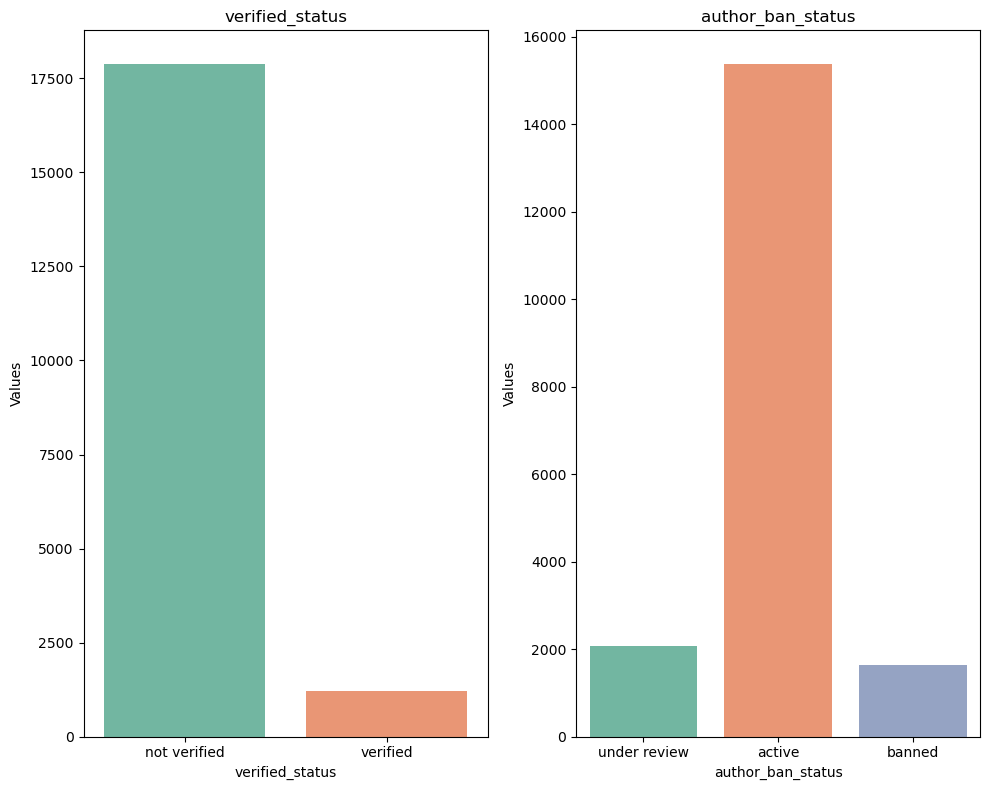

In [13]:
cat_features = ['verified_status', 'author_ban_status']

plt.figure(figsize=(10, 8))

for i, col in enumerate(cat_features):
    plt.subplot(1, 2, i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(col)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In the 'verified_status' column, a higher proportion of instances are labeled as 'not verified' compared to 'verified,' indicating that the majority of entries lack a verified status. On the other hand, in the 'author_ban_status' column, the 'active' status dominates, followed by instances 'under review,' while the 'banned' status is the least prevalent.

## 2. Feature Engineering
### 2.1 Normalized numerical features

To address the inherent differences in scale among the features, a normalization process was employed. Normalization was performed to bring all features to a consistent scale, ensuring that each feature contributes proportionally to the model training process. This is particularly crucial for models like logistic regression, where the scale of features can impact the optimization process.

In [14]:
num_data = df[num_features]

scaler = StandardScaler()
numerical_features = pd.DataFrame(scaler.fit_transform(num_data), columns=num_data.columns)

numerical_features

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1.637872,0.274362,-0.486292,-0.514877,-0.523104,-0.436849
1,-0.026119,-0.352545,-0.052090,0.071757,0.055667,0.418560
2,-0.087748,2.005286,0.100327,-0.433186,-0.107985,-0.025402
3,-0.457524,0.566138,1.166638,0.564275,0.092090,0.293500
4,-0.827300,-0.614899,-0.369650,-0.394104,-0.250682,-0.246758
...,...,...,...,...,...,...
19079,1.021579,-0.770063,-0.628718,-0.519871,-0.519611,-0.434348
19080,-0.580783,-0.779645,-0.625742,-0.520215,-0.522106,-0.436849
19081,1.083208,-0.786579,-0.631123,-0.522181,-0.522605,-0.435598
19082,-1.505223,-0.778341,-0.626979,-0.518560,-0.518114,-0.431846


### 2.2 Encode categorical features

In [15]:
cat_data = df[cat_features]

encoder = LabelEncoder()
categorical_features = pd.DataFrame(cat_data.apply(encoder.fit_transform), columns=cat_data.columns)

### 2.3 Combine all features

In [16]:
X = pd.concat([numerical_features, categorical_features], axis=1)

## 3. Model Building
### 3.1 Train Test Split

In [17]:
df['claim_status'] = df['claim_status'].apply(lambda x: 1 if x == 'claim' else 0)
y = df['claim_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 3.2 Model Fitting
The choice of logistic regression as the modeling technique stems from its robustness to the distribution of predictor variables and its ability to provide meaningful interpretations. Logistic regression is well-suited for this analysis as it can effectively model the relationship between the predictors and the binary target variable, 'claim' or 'opinion.' Its assumption of linearity in the log-odds ensures stability even in the presence of skewed predictors. Furthermore, logistic regression provides coefficients that offer insights into the impact of each predictor on the odds of the target variable.

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)
model

LogisticRegression()

### 3.3 Model Evaluation

In [19]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9817648291762733


In [20]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2370
           1       1.00      0.96      0.98      2401

    accuracy                           0.98      4771
   macro avg       0.98      0.98      0.98      4771
weighted avg       0.98      0.98      0.98      4771



The classification report provides a detailed evaluation of the logistic regression model's performance. For class 0 ('opinion'), the model demonstrates excellent precision of 0.96 and perfect recall of 1.00. This indicates that 96% of instances predicted as 'opinion' are indeed 'opinion,' and all actual 'opinion' instances are correctly identified by the model. The high F1-score of 0.98 underscores the robustness of the model in capturing true positives for class 0.

For class 1 ('claim'), the model maintains perfect precision of 1.00, signifying that all instances predicted as 'claim' are indeed 'claim'. The recall for class 1 is 0.96, implying that 96% of actual 'claim' instances are accurately classified by the model. The F1-score of 0.98 for class 1 highlights the model's effectiveness in handling this class.

The overall accuracy of 0.98 indicates the proportion of correctly classified instances out of the total dataset. The macro and weighted average metrics, both at 0.98, suggest a well-balanced performance across classes, considering their respective supports.

### 3.4 Features Importance

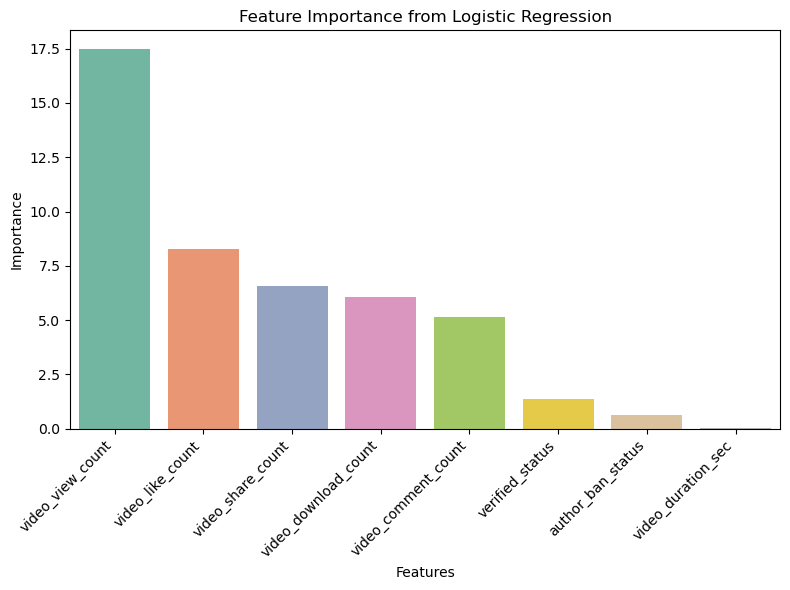

In [21]:
feature_importance = np.abs(model.coef_[0])

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='Set2')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from Logistic Regression')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The feature importance analysis reveals valuable insights into the factors driving the predictive power of the logistic regression model. Among the numerous features considered, the top three contributors to the model's predictions are identified as 'video_view_count,' 'video_like_count,' and 'video_share_count.